In [3]:
import pandas as pd
import numpy as np

In [4]:
dados =pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


#Teste de hipóteses

##Teste de normalidade

In [5]:
from scipy.stats import normaltest
#Hipótese h0 é que a distribuição é normal

In [6]:
significancia = 0.05

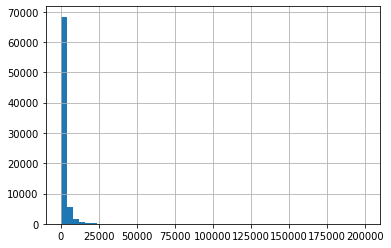

In [7]:
dados.Renda.hist(bins=50)

In [8]:
stat_test, p_valor = normaltest(dados.Renda)
print(stat_test, p_valor)

152380.75803960307 0.0


In [9]:
p_valor <= significancia #Se true regeita h0

True

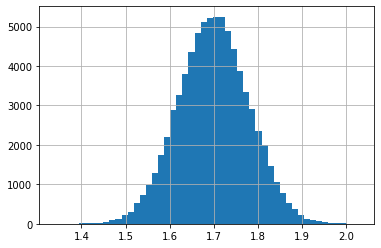

In [10]:
dados.Altura.hist(bins=50)

In [11]:
stat_test, p_valor = normaltest(dados.Altura)
print(stat_test, p_valor)

0.19973093957002253 0.9049591541967501


In [12]:
p_valor <= significancia #Se true regeita h0

False

###Problema

In [13]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [14]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head

<bound method NDFrame.head of     Amostra
0       509
1       505
2       495
3       510
4       496
5       509
6       497
7       502
8       503
9       505
10      501
11      505
12      510
13      505
14      504
15      497
16      506
17      506
18      508
19      505
20      497
21      504
22      500
23      498
24      506
25      496
26      508
27      497
28      503
29      501
30      503
31      506
32      499
33      498
34      509
35      507
36      503
37      499
38      509
39      495
40      502
41      505
42      504
43      509
44      508
45      501
46      505
47      497
48      508
49      507>

In [15]:
media_amostra = amostra.mean()[0]
media_amostra

503.24

In [16]:
dp_amostra = amostra.std()[0]
dp_amostra

4.483803050527347

In [17]:
n = 50
significancia = 0.05
congianca = 1 - significancia
media = 500
#h0 = 500 Distribuição normal
#h1 != 500 Distribuição não normal

In [18]:
from scipy.stats import norm

In [19]:
prob = (0.5 + (congianca/2))
prob

0.975

In [20]:
z_norm =  norm.ppf(prob)
z_norm

1.959963984540054

In [21]:
z = (media_amostra- media) / (dp_amostra/np.sqrt(n))
z

5.109559775991877

In [22]:
z > z_norm #Rejeita a hipótese zero

True

In [23]:
#Teste p_valor
p_valor = 2 * (1 - norm.cdf(z))
p_valor

3.2291031715203644e-07

In [24]:
p_valor <= significancia #SE True rejeita h0

True

In [25]:
z = (485- 500) / (20/np.sqrt(30))
print(z)
media_amostra = 485
desvio_padrao = 20
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 30

probabilidade = (0.5 + (confianca / 2))
z_alpha_2 = norm.ppf(probabilidade)

z = (media_amostra - media) / (desvio_padrao / np.sqrt(n))

print('z =', round(z, 4))
if(z <= -z_alpha_2 or z >= z_alpha_2):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

p_valor = 2 * (1 - norm.cdf(abs(z)))
print('p-valor =', round(p_valor, 8))
if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

-4.107919181288746
z = -4.1079
Rejeitar H0
p-valor = 3.992e-05
Rejeitar H0


In [26]:
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
ztest(x1 = amostra, value = media)

(array([5.10955978]), array([3.22910317e-07]))

In [28]:
from statsmodels.stats.weightstats import DescrStatsW

In [29]:
teste = DescrStatsW(amostra)
teste.ztest_mean(value = media)

(array([5.10955978]), array([3.22910317e-07]))

##Teste t-student

In [30]:
from scipy.stats import t as t_student

In [31]:
tabela_t_student = pd.DataFrame(
    [],
    index=[i for i in range(1, 31)],
    columns=[i/100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for columns in tabela_t_student.columns:
        tabela_t_student.loc[index, columns] = t_student.ppf(1 - float(columns) / 2, index)

index=[('Graus de liberdade (n-1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [('{0:0.3f}'.format(i/100), '{0:0.3f}'.format((i / 100)/2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace=True)

tabela_t_student

Bicaudal                       0.100    0.090  ...    0.020    0.010
Unicaudal                      0.050    0.045  ...    0.010    0.005
Graus de liberdade (n-1) 1   6.31375  7.02637  ...  31.8205  63.6567
                         2   2.91999  3.10398  ...  6.96456  9.92484
                         3   2.35336  2.47081  ...   4.5407  5.84091
                         4   2.13185   2.2261  ...  3.74695  4.60409
                         5   2.01505  2.09784  ...  3.36493  4.03214
                         6   1.94318   2.0192  ...  3.14267  3.70743
                         7   1.89458  1.96615  ...  2.99795  3.49948
                         8   1.85955  1.92799  ...  2.89646  3.35539
                         9   1.83311  1.89922  ...  2.82144  3.24984
                         10  1.81246  1.87677  ...  2.76377  3.16927
                         11  1.79588  1.85877  ...  2.71808  3.10581
                         12  1.78229  1.84402  ...    2.681  3.05454
                         13  1.77093   1.8317  ...  2.65031  3.01228
                         14  1.76131  1.82127  ...  2.62449  2.97684
                         15  1.75305  1.81232  ...  2.60248  2.94671
                         16  1.74588  1.80455  ...  2.58349  2.92078
                         17  1.73961  1.79776  ...  2.56693  2.89823
                         18  1.73406  1.79175  ...  2.55238  2.87844
                         19  1.72913  1.78642  ...  2.53948  2.86093
                         20  1.72472  1.78164  ...  2.52798  2.84534
                         21  1.72074  1.77734  ...  2.51765  2.83136
                         22  1.71714  1.77345  ...  2.50832  2.81876
                         23  1.71387  1.76991  ...  2.49987  2.80734
                         24  1.71088  1.76667  ...  2.49216  2.79694
                         25  1.70814  1.76371  ...  2.48511  2.78744
                         26  1.70562  1.76098  ...  2.47863  2.77871
                         27  1.70329  1.75847  ...  2.47266  2.77068
                         28  1.70113  1.75613  ...  2.46714  2.76326
                         29  1.69913  1.75397  ...  2.46202  2.75639
                         30  1.69726  1.75195  ...  2.45726     2.75

[30 rows x 10 columns]

In [32]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45]
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


In [33]:
media_amostra = amostra.mean()[0]
media_amostra

36.250400000000006

In [34]:
dp_amostra = amostra.std()[0]
dp_amostra

0.9667535018469453

In [35]:
media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
gl = n - 1

In [36]:
from scipy.stats import t as t_student

In [37]:
t_alpha = t_student.ppf(confianca, gl)
t_alpha

1.7108820799094275

In [38]:
t = (media_amostra - media) / (dp_amostra/np.sqrt(n))
t

-3.876893119952045

In [39]:
t <= t_alpha #Se true rejeitar hipótese H0

True

In [40]:
p_valor = t_student.sf(t, gl)
p_valor

0.9996406170303819

In [41]:
p_valor <= significancia # Se true rejeita h0

False

In [42]:
teste = DescrStatsW(amostra)
teste.ttest_mean(value = media, alternative='larger') #se for unicaldal inferior 'smaller'

(array([-3.87689312]), array([0.99964062]), 24.0)

In [43]:
t = (230 - 150) / (90/np.sqrt(20))
t
media_amostra = 230
desvio_padrao_amostra = 90
media = 150
significancia = 0.05
confianca = 1 - significancia
n = 20
graus_de_liberdade = n - 1

t_alpha = t_student.ppf(confianca, graus_de_liberdade)

t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))

print('t(alpha) =', round(t_alpha, 4))
print('t =', round(t, 4))
if(t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

t(alpha) = 1.7291
t = 3.9752
Rejeitar H0


In [44]:
media_amostra = 330
desvio_padrao_amostra = 80
media = 350
significancia = 0.05
confianca = 1 - significancia
n = 35
graus_de_liberdade = n - 1

t_alpha = t_student.ppf(confianca, graus_de_liberdade)

t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))

print('t(alpha) =', round(t_alpha, 4))
print('t =', round(t, 4))
if(t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

t(alpha) = 1.6909
t = -1.479
Aceitar H0


##Teste para duas amostras

In [45]:
homens = dados.query('Sexo == 0').sample(n=500, random_state=101).Renda
homens

26241     300
65579    1000
58984    4000
65931    5000
25501     300
         ... 
25494     220
1452      600
29454     788
5289     1750
54618    7000
Name: Renda, Length: 500, dtype: int64

In [46]:
mulheres = dados.query('Sexo == 1').sample(n=500, random_state=101).Renda
mulheres

10179     788
43943    1200
75223    6000
33243    1000
5189      788
         ... 
7383     1000
70775     400
56737    2000
35947     200
47913    1600
Name: Renda, Length: 500, dtype: int64

In [47]:
media_homens = homens.mean()
media_homens

2142.608

In [48]:
media_mulheres=mulheres.mean()
media_mulheres

1357.528

In [49]:
dp_homens = homens.std()
dp_homens

2548.050802499875

In [50]:
dp_mulheres = mulheres.std()
dp_mulheres

1569.9011907484578

In [51]:
significancia = 0.05
confianca = 1 - significancia
n_h = len(homens)
n_m = len(mulheres)
d_0 = 0

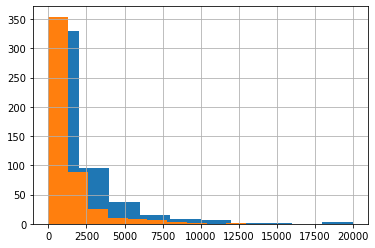

In [52]:
homens.hist()
mulheres.hist()

In [53]:
z_alpha = norm.ppf(confianca)
z_alpha

1.6448536269514722

In [54]:
z = ((media_homens - media_mulheres) - d_0) / np.sqrt((dp_homens**2/n_h) + (dp_mulheres**2/n_m))
z

5.86562005776475

In [55]:
z > z_alpha #se True rejeita h0 de que a média das duas amostras são iguais

True

In [56]:
shampoo_Novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])
media_novo = shampoo_Novo.mean()
dp_novo = shampoo_Novo.std()
media_antigo = shampoo_Antigo.mean()
dp_antigo = shampoo_Antigo.std()
significancia = 1 - confianca
confianca = 0.95
n_n = len(shampoo_Novo)
n_a = len(shampoo_Antigo)
d_0 = 2 #h0 de que media do novo é igual a 2cm mais que media do antigo
gl = (n_n + n_a) - 2

In [57]:
t_alpha = t_student.ppf(confianca, gl)
t_alpha

1.7340636066175354

In [58]:
t = ((media_novo - media_antigo) - d_0) / np.sqrt((dp_novo**2/n_n) + (dp_antigo**2/n_a))
t

2.6646283978779315

In [59]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [60]:
teste_h = DescrStatsW(homens)
teste_m = DescrStatsW(mulheres)
teste = teste_h.get_compare(teste_m)
z , p_valor = teste.ztest_ind(alternative='larger', value=0)
print(z , p_valor)

5.865620057764754 2.2372867859458255e-09


In [61]:
p_valor <= significancia #se True rejeita h0 de que a média das duas amostras são iguais

True

In [62]:
teste = CompareMeans(teste_h, teste_m)
z , p_valor = teste.ztest_ind(alternative='larger', value=0)
print(z , p_valor)

5.865620057764754 2.2372867859458255e-09


#Teste não paramétrico

##teste qui-quadrado

In [63]:
from scipy.stats import chi

In [64]:
tabela_t_chi_2 = pd.DataFrame(
    [],
    index = [i for i in range(1, 31)],
    columns = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.975, 0.99, 0.995]
)

for index in tabela_t_chi_2.index:
    for columns in tabela_t_chi_2.columns:
        tabela_t_chi_2.loc[index, columns] = f'{chi.ppf(float(columns), index)**2:.4f}'

tabela_t_chi_2.index.name='Graus de Liberdade'
tabela_t_chi_2.rename_axis(['P'], axis=1, inplace=True)

tabela_t_chi_2

P,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.950,0.975,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,3.8415,5.0239,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,5.9915,7.3778,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,7.8147,9.3484,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,3.3567,5.3853,7.7794,9.4877,11.1433,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,4.3515,6.6257,9.2364,11.0705,12.8325,15.0863,16.7496
6,0.6757,0.8721,1.2373,1.6354,2.2041,3.4546,5.3481,7.8408,10.6446,12.5916,14.4494,16.8119,18.5476
7,0.9893,1.2390,1.6899,2.1673,2.8331,4.2549,6.3458,9.0371,12.0170,14.0671,16.0128,18.4753,20.2777
8,1.3444,1.6465,2.1797,2.7326,3.4895,5.0706,7.3441,10.2189,13.3616,15.5073,17.5345,20.0902,21.9550
9,1.7349,2.0879,2.7004,3.3251,4.1682,5.8988,8.3428,11.3888,14.6837,16.9190,19.0228,21.6660,23.5894


In [65]:
f_obs = [17, 33]
f_esp = [25, 25]
significancia = 0.05
confianca = 1 - significancia
k = 2 #Número de eventos possíveis
gl = k - 1
#H0 não há diferença entre as frequências

In [66]:
chi_alpha = chi.ppf(confianca, gl) **2
chi_alpha

3.8414588206941245

In [67]:
chi_2 = ((f_obs[0] - f_esp[0])**2/f_esp[0]) + ((f_obs[1] - f_esp[1])**2/f_esp[1])
chi_2

5.12

In [68]:
chi_2 = 0
for i in range(k):
    chi_2 += (f_obs[i] - f_esp[i])**2/f_esp[i]
print(chi_2)

5.12


In [69]:
chi_2 >= chi_alpha #Se True rejeita H0

True

In [70]:
p_valor = chi.sf(np.sqrt(chi_2),gl)
p_valor

0.023651616655355978

In [71]:
p_valor <= significancia #Se True rejeita H0

True

In [72]:
from scipy.stats import chisquare

In [73]:
chisquare(f_obs=f_obs, f_exp=f_esp)

Power_divergenceResult(statistic=5.12, pvalue=0.023651616655356)

In [74]:
p_valor = chi.sf(np.sqrt(7.45),5)
p_valor

0.18926579121171605

In [93]:
#problema
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9 ,6]
}
significancia = 0.05
confianca = 1 - significancia
n = 35

In [94]:
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [95]:
media_a = fumo.Antes.mean()
media_a
dp_a = fumo.Antes.std()

In [96]:
media_d = fumo.Depois.mean()
media_d
dp_d = fumo.Depois.std()

In [97]:
prob = 0.5+ confianca/2

In [98]:
z_alpha_2 = norm.ppf(prob)
z_alpha_2

1.959963984540054

In [99]:
fumo['Dif'] = fumo['Depois'] - fumo['Antes']

In [100]:
fumo['|Dif|'] = abs(fumo['Depois'] - fumo['Antes'])

In [101]:
 fumo.sort_values(by='|Dif|', inplace=True)

In [102]:
 fumo['Posto'] = range(1, len(fumo)+1)

In [103]:
posto = fumo[['|Dif|','Posto']].groupby(['|Dif|']).mean()
posto

,Posto
|Dif|,
1,1.5
2,3.0
4,4.5
5,6.0
8,7.0
9,8.5
11,10.0
12,11.5
13,13.0


In [104]:
posto.reset_index(inplace=True)

In [105]:
fumo.drop(['Posto'], axis=1, inplace=True)

In [106]:
fumo = fumo.merge (posto, left_on='|Dif|', right_on='|Dif|', how='left')

In [107]:
fumo

,Antes,Depois,Dif,|Dif|,Posto
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,12,16,4,4,4.5
4,14,18,4,4,4.5
5,22,17,-5,5,6.0
6,21,13,-8,8,7.0
7,23,14,-9,9,8.5
8,10,19,9,9,8.5
9,15,4,-11,11,10.0


In [108]:
fumo['posto +'] = fumo.apply(lambda x: x.Posto if x.Dif>0 else 0, axis=1)

In [109]:
fumo['posto -'] = fumo.apply(lambda x: x.Posto if x.Dif<0 else 0, axis=1)

In [110]:
fumo.drop(['Posto'], axis=1, inplace=True)

In [111]:
fumo

,Antes,Depois,Dif,|Dif|,posto +,posto -
0,13,14,1,1,1.5,0.0
1,17,16,-1,1,0.0,1.5
2,17,19,2,2,3.0,0.0
3,12,16,4,4,4.5,0.0
4,14,18,4,4,4.5,0.0
5,22,17,-5,5,0.0,6.0
6,21,13,-8,8,0.0,7.0
7,23,14,-9,9,0.0,8.5
8,10,19,9,9,8.5,0.0
9,15,4,-11,11,0.0,10.0


In [113]:
T = min(fumo['posto +'].sum(), fumo['posto -'].sum())
T

22.0

In [114]:
mu_t = n * (n+1)/4
mu_t

315.0

In [116]:
sigma_t = np.sqrt((n * (n+1) * ((2 * n)+1))/24)
sigma_t

61.053255441458646

In [117]:
z = (T- mu_t)/sigma_t
z

-4.799088891843698

In [121]:
from scipy.stats import wilcoxon

In [122]:
wilcoxon(fumo.Antes, fumo.Depois)

WilcoxonResult(statistic=22.0, pvalue=1.584310018505865e-06)

In [123]:
from scipy.stats import mannwhitneyu

In [124]:
mannwhitneyu(mulheres, homens, alternative='less')

MannwhitneyuResult(statistic=90804.0, pvalue=3.2434754177675195e-14)